In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import seaborn as sns
from pandas.plotting import scatter_matrix

# Statistical data year by year

In [3]:
path = 'dane_years/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2001.csv',
 '2002.csv',
 '2003.csv',
 '2004.csv',
 '2005.csv',
 '2006.csv',
 '2007.csv',
 '2008.csv',
 '2009.csv',
 '2010.csv',
 '2011.csv',
 '2012.csv',
 '2013.csv',
 '2014.csv',
 '2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 'pools_edited.csv']

In [4]:
yr_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0))(f) for f in files[:-1]]

In [5]:
for yi in range(len(yr_list)):
    y = files[yi].split('.')[0]
    c = yr_list[yi].columns
    c = [y+'-'+ci for ci in c]
    # c = [y[2:]+'-'+str(ci) for ci in range(len(c))]
    yr_list[yi].columns = c

In [6]:
df_yr = pd.concat(yr_list, axis=1, sort=False)
df_yr = df_yr.dropna(axis='columns')

In [7]:
df_yr_scaled = df_yr / df_yr.max()

In [8]:
df_yr_scaled

,2001-emeryci_i_rencisci,2001-bezrobocie_zarejsestrowane,2001-malzenstwa_zawarte,2001-dochody_gminy,2001-wyksztalcenie_gim_pod_nizsze,2001-wyksztalcenie_srednie,2001-rozwody_powiat,2001-praca_najemna,2001-praca_wlasny_rachunek,2001-socjal,...,2018-rozwody_powiat,2018-udzial_wiek_przedprodukcyjny,2018-udzial_wiek_produkcyjny,2018-udzial_wiek_poprodukcyjny,2018-praca_najemna,2018-praca_wlasny_rachunek,2018-socjal_500plus,2018-socjal,2018-PKB_na_1_mieszkanca,2018-przestepstwa_ogolem
jednostka,,,,,,,,,,,,,,,,,,,,,
MAŁOPOLSKIE,0.684194,0.615666,0.649653,0.474158,0.738602,0.849112,0.377421,0.728840,0.785987,0.861968,...,0.462325,0.969388,0.983871,0.843882,0.782569,0.781085,0.831224,0.764644,0.572133,0.662219
ŚLĄSKIE,0.978570,0.905336,0.892075,0.836481,0.677812,0.931953,1.000000,0.852630,0.620205,1.000000,...,0.859100,0.867347,0.972581,0.953586,0.840657,0.507728,0.760983,1.000000,0.645658,0.976675
LUBUSKIE,0.200065,0.295237,0.184317,0.158825,0.744681,0.917160,0.232097,0.734198,0.865055,0.856056,...,0.171567,0.923469,0.983871,0.886076,0.828977,0.737190,0.895383,0.794809,0.511034,0.223009
WIELKOPOLSKIE,0.671868,0.685512,0.683248,0.506664,0.747720,0.872781,0.564180,0.706902,0.819909,0.830279,...,0.609864,0.984694,0.979032,0.839662,0.747182,0.585568,0.847853,0.767258,0.669339,0.531534
ZACHODNIOPOMORSKIE,0.304977,0.506593,0.309460,0.277003,0.835866,0.902367,0.334184,0.790305,0.731837,0.821686,...,0.344399,0.882653,0.980645,0.924051,0.844601,0.640649,0.645446,0.869462,0.515353,0.354457
DOLNOŚLĄSKIE,0.588495,0.772670,0.536344,0.492648,0.750760,0.902367,0.704249,0.780474,0.717405,0.905010,...,0.590157,0.867347,0.974194,0.953586,0.874673,0.615542,0.759245,0.859194,0.681654,0.662476
OPOLSKIE,0.183288,0.226966,0.182294,0.154542,0.775076,0.807692,0.202222,0.819269,0.434563,0.786646,...,0.159132,0.811224,1.000000,0.928270,0.674806,0.321734,0.875155,0.861166,0.492935,0.153602
KUJAWSKO-POMORSKIE,0.401270,0.592954,0.419867,0.320593,0.841945,0.798817,0.385077,0.704956,0.551622,0.801979,...,0.343661,0.918367,0.982258,0.886076,0.707932,0.419940,0.813105,0.833474,0.504009,0.386541
POMORSKIE,0.376686,0.507731,0.446247,0.360868,0.747720,0.917160,0.380123,0.868956,0.964722,0.792637,...,0.375066,1.000000,0.972581,0.843882,0.828416,0.841332,0.922686,0.798660,0.603279,0.402294


In [9]:
corr = df_yr_scaled.corr()
#corr.style.background_gradient(cmap='coolwarm')

In [10]:
#corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

In [4]:
df_jednostki = pd.read_csv('dane/_jednostki.csv', sep=';')
df_jednostki.okręgi = [ o.replace(' ', '_') for o in df_jednostki.okręgi ]
df_jednostki.województwo = [ w.upper() for w in df_jednostki.województwo ]

df_jednostki.loc[df_jednostki['województwo']=='WARSZAWA','województwo'] = 'MAZOWIECKIE'

## 2005

In [34]:
wyniki_2005 = pd.read_csv("wyniki_wyborow/"+"2005_O"+".csv")
col = wyniki_2005.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2005.columns = col
wyniki_2005['jednostka'] = [ w.replace('O_', '') for w in wyniki_2005['jednostka'] ]
wyniki_2005 = wyniki_2005.fillna(0)

wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])

In [35]:
col_b = ['LPR','PSL','PiS','Samoobrona']
col_r = ['SLD','PO']
col_g = [c for c in wyn_05.columns.values.tolist() if c not in col_r+col_b+['jednostka','nr','okręgi','powiaty']]
wyn_05['Blue'] = wyn_05.loc[:, col_b].sum(axis = 1, skipna = True) 
wyn_05['Red'] = wyn_05.loc[:, col_r].sum(axis = 1, skipna = True) 
wyn_05['Gray'] = wyn_05.loc[:, col_g].sum(axis = 1, skipna = True) 

In [36]:
wyn_05 = wyn_05.groupby('województwo').agg(np.sum)
wyn_05 = wyn_05[['Blue','Red','Gray']]
wyn_05.to_csv("wyniki_wyborow/2005_O_simplified.csv")
wyn_05

,Blue,Red,Gray
województwo,,,
DOLNOŚLĄSKIE,403165.0,354677,109375.0
KUJAWSKO-POMORSKIE,301227.0,199374,70123.0
LUBELSKIE,464224.0,156883,65688.0
LUBUSKIE,134531.0,109282,26711.0
MAZOWIECKIE,978071.0,627435,222722.0
MAŁOPOLSKIE,648485.0,350577,92667.0
OPOLSKIE,114005.0,92401,60418.0
PODKARPACKIE,467906.0,162311,46239.0
PODLASKIE,208603.0,95218,41665.0


In [37]:
# aggregacja
#wyn_05 = wyn_05.groupby('województwo').agg(np.sum)[[]]#.reset_index()
#del wyn_05['nr']
wyn_05 = wyn_05.T
wyn_05 /= wyn_05.sum()
wyn_05 = wyn_05.T

df_yr05 = pd.concat([yr_list[4],wyn_05], axis=1, sort=False)

In [38]:
#df_yr_scatter = yr_list[4].dropna(axis='columns')
#df_yr_scatter /= df_yr_scatter.sum()
df_yr05 = df_yr05.dropna(axis='columns')
corr05 = df_yr05.corr()
corr05.iloc[:19,19:].style.background_gradient(cmap='coolwarm').set_precision(2)

,Blue,Red,Gray
2005-emeryci_i_rencisci,-0.06,0.15,-0.16
2005-bezrobocie_zarejsestrowane,-0.14,0.27,-0.2
2005-bezrobocie_zarejsestrowane_gminy,-0.14,0.27,-0.2
2005-malzenstwa_zawarte,-0.07,0.18,-0.19
2005-ludnosc_na_1km2,-0.21,0.26,-0.013
2005-dochody_gminy,-0.17,0.25,-0.096
2005-dochody_na_mieszkanca,-0.46,0.56,-0.015
2005-wyksztalcenie_gim_pod_nizsze,0.36,-0.35,-0.14
2005-wyksztalcenie_srednie,-0.067,0.16,-0.16
2005-rozwody_powiat,-0.36,0.45,-0.035


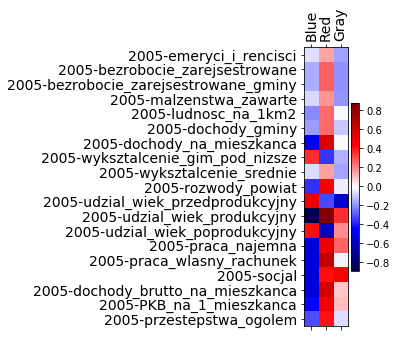

In [39]:
f = plt.figure(figsize=(1, 5))
plt.matshow(corr05.iloc[:19,19:], fignum=f.number,cmap='seismic')
plt.xticks(range(corr05.iloc[19:,19:].shape[1]), corr05.iloc[:-3,-3:].columns.values, fontsize=14, rotation=90)
plt.yticks(range(corr05.iloc[:19,:19].shape[1]), corr05.iloc[:-3,-3:].index.values, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.savefig('dane_years/img/correlatin_simplified_2005.eps',  bbox_inches='tight', format='eps')

## 2007

In [5]:
wyniki = pd.read_csv("wyniki_wyborow/"+"2007_O"+".csv")
col = wyniki.columns.values.tolist()
col[0] = 'jednostka'
wyniki.columns = col
wyniki['jednostka'] = [ w.replace('O_', '') for w in wyniki['jednostka'] ]
wyniki = wyniki.fillna(0)

wyn_07 = wyniki.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])

In [6]:
col_b = ['PSL','PiS']
col_r = ['SLD','PO']
col_g = [c for c in wyn_07.columns.values.tolist() if c not in col_r+col_b+['jednostka','nr','okręgi','powiaty']]
wyn_07['Blue'] = wyn_07.loc[:, col_b].sum(axis = 1, skipna = True) 
wyn_07['Red'] = wyn_07.loc[:, col_r].sum(axis = 1, skipna = True) 
wyn_07['Gray'] = wyn_07.loc[:, col_g].sum(axis = 1, skipna = True) 

In [7]:
wyn_07 = wyn_07.groupby('województwo').agg(np.sum)
wyn_07 = wyn_07[['Blue','Red','Gray']]
wyn_07.to_csv("wyniki_wyborow/2007_O_simplified.csv")
wyn_07

,Blue,Red,Gray
województwo,,,
DOLNOŚLĄSKIE,420983,768406,42581.0
KUJAWSKO-POMORSKIE,287570,490576,33485.0
LUBELSKIE,478302,322140,52762.0
LUBUSKIE,121621,255057,17537.0
MAZOWIECKIE,1108208,1361875,96444.0
MAŁOPOLSKIE,692611,662226,53468.0
OPOLSKIE,108687,212933,46920.0
PODKARPACKIE,481519,306938,33134.0
PODLASKIE,221146,217120,22914.0


## 2011

In [60]:
wyniki = pd.read_csv("wyniki_wyborow/"+"2011_O"+".csv")
col = wyniki.columns.values.tolist()
col[0] = 'jednostka'
wyniki.columns = col

#Kraków II -> Chrzanów 

wyniki['jednostka'] = [ w.replace('O_', '') for w in wyniki['jednostka'] ]
wyniki = wyniki.fillna(0)

wyn_11 = wyniki.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])

In [61]:
col_b = ['PiS']
col_r = ['SLD','PO','LiD','Ruch Palikota/Twój Ruch','PSL']
col_g = [c for c in wyn_11.columns.values.tolist() if c not in col_r+col_b+['jednostka','nr','okręgi','powiaty']]
wyn_11['Blue'] = wyn_11.loc[:, col_b].sum(axis = 1, skipna = True) 
wyn_11['Red'] = wyn_11.loc[:, col_r].sum(axis = 1, skipna = True) 
wyn_11['Gray'] = wyn_11.loc[:, col_g].sum(axis = 1, skipna = True) 

/home/marek/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [62]:
wyn_11 = wyn_11.groupby('województwo').agg(np.sum)
wyn_11 = wyn_11[['Blue','Red','Gray']]
wyn_11.to_csv("wyniki_wyborow/2011_O_simplified.csv")
wyn_11

,Blue,Red,Gray
województwo,,,
DOLNOŚLĄSKIE,276859,752817.0,36523.0
KUJAWSKO-POMORSKIE,171681,519013.0,28595.0
LUBELSKIE,301627,441492.0,34965.0
LUBUSKIE,72302,247803.0,12551.0
MAZOWIECKIE,760501,1487679.0,96617.0
MAŁOPOLSKIE,504545,712760.0,65440.0
OPOLSKIE,65739,215099.0,38828.0
PODKARPACKIE,352949,368626.0,33776.0
PODLASKIE,158572,249562.0,20589.0


## 2015

In [80]:
wyniki = pd.read_csv("wyniki_wyborow/2015_O.csv")
col = wyniki.columns.values.tolist()

col[-1] = 'jednostka_nr'
wyniki.columns = col

wyniki = wyniki.fillna(0)

wyn_15 = wyniki.merge(df_jednostki,how='outer',left_on=['jednostka_nr'],right_on=['nr'])

wyn_15 = wyn_15.iloc[:,1:]
wyn_15.columns

Index(['SLD', 'Razem KW KORWiN', 'Nowoczesna.pl', 'PO', 'PiS',
       'Razem KW Razem', 'Razem KW Samoobrona',
       'Razem KWW Grzegorza Brauna „Szczęść Boże!”',
       'Razem KWW JOW Bezpartyjni', 'Razem KWW Mniejszość Niemiecka', 'PO.1',
       'Razem KWW Ruch Społeczny RP', 'Razem KWW Zbigniewa Stonogi',
       'Razem KWW Zjednoczeni dla Śląska', 'Kukiz',
       'Razem Komitet Wyborczy Kongres Nowej Prawicy', 'PSL', 'jednostka_nr',
       'nr', 'okręgi', 'powiaty', 'województwo'],
      dtype='object')

In [81]:
col_b = ['PiS','PSL','Kukiz']#,'KORWIN/ Wolnośc/ KONFEDERACJA']
col_r = ['SLD','PO','Nowoczesna.pl']#,'Wiosna','Razem']
col_g = [c for c in wyn_15.columns.values.tolist() if c not in col_r+col_b+['jednostka','nr','okręgi','powiaty']]
wyn_15['Blue'] = wyn_15.loc[:, col_b].sum(axis = 1, skipna = True) 
wyn_15['Red'] = wyn_15.loc[:, col_r].sum(axis = 1, skipna = True) 
wyn_15['Gray'] = wyn_15.loc[:, col_g].sum(axis = 1, skipna = True) 

In [82]:
wyn_15 = wyn_15.groupby('województwo').agg(np.sum)
wyn_15 = wyn_15[['Blue','Red','Gray']]
wyn_15.to_csv("wyniki_wyborow/2015_O_simplified.csv")
wyn_15

,Blue,Red,Gray
województwo,,,
DOLNOŚLĄSKIE,499149.0,512619.0,102011.0
KUJAWSKO-POMORSKIE,341143.0,331863.0,63790.0
LUBELSKIE,552573.0,210951.0,63895.0
LUBUSKIE,145904.0,166957.0,33365.0
MAZOWIECKIE,1294629.0,990704.0,251372.0
MAŁOPOLSKIE,857057.0,435178.0,124009.0
OPOLSKIE,148923.0,135724.0,53622.0
PODKARPACKIE,584004.0,182876.0,67287.0
PODLASKIE,272200.0,128270.0,34922.0


## 2019

In [112]:
wyniki = pd.read_csv("wyniki_wyborow/2019_O.csv")
col = wyniki.columns.values.tolist()

col[0] = 'województwo'
wyniki.columns = col

wyniki = wyniki.fillna(0)

wyn_19 = wyniki.iloc[2:,:]

wyn_19['województwo'] = [x.upper() for x in wyn_19['województwo']]

for c in wyn_19.columns[1:]:
    wyn_19[c] = wyn_19[c].astype(float)

wyn_19

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,województwo,PO,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KORWIN/ Wolnośc/ KONFEDERACJA,PSL,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,PiS,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,SLD,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
2,DOLNOŚLĄSKIE,413632.0,0.0,89440.0,93803.0,0.0,525007.0,0.0,206861.0,41150.0,0.0
3,KUJAWSKO-POMORSKIE,262370.0,0.0,61031.0,90722.0,0.0,350198.0,0.0,136839.0,11152.0,0.0
4,LUBELSKIE,168586.0,0.0,63451.0,99078.0,0.0,552086.0,0.0,71556.0,12158.0,0.0
5,LUBUSKIE,136955.0,0.0,31490.0,50943.0,0.0,150188.0,0.0,68341.0,0.0,0.0
6,MAZOWIECKIE,935365.0,1412.0,212037.0,261664.0,0.0,1283424.0,2503.0,416349.0,26366.0,0.0
7,MAŁOPOLSKIE,370579.0,0.0,124631.0,145751.0,1765.0,876381.0,0.0,154467.0,9214.0,0.0
8,OPOLSKIE,108570.0,0.0,23176.0,41901.0,0.0,152999.0,0.0,47699.0,0.0,32094.0
9,PODKARPACKIE,146949.0,0.0,75215.0,76523.0,0.0,614756.0,3530.0,62394.0,0.0,0.0
10,PODLASKIE,109527.0,1775.0,36207.0,48566.0,0.0,270888.0,2272.0,47342.0,4001.0,0.0
11,POMORSKIE,426692.0,0.0,80517.0,77335.0,0.0,381335.0,0.0,143672.0,0.0,0.0


In [113]:
col_b = ['PiS','KORWIN/ Wolnośc/ KONFEDERACJA']
col_r = ['SLD','PO','PSL']#,'Wiosna','Razem']
col_g = [c for c in wyn_19.columns.values.tolist() if c not in col_r+col_b+['województwo','nr','okręgi','powiaty']]
wyn_19['Blue'] = wyn_19.loc[:, col_b].sum(axis = 1, skipna = True) 
wyn_19['Red'] = wyn_19.loc[:, col_r].sum(axis = 1, skipna = True) 
wyn_19['Gray'] = wyn_19.loc[:, col_g].sum(axis = 1, skipna = True) 
wyn_19

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,województwo,PO,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KORWIN/ Wolnośc/ KONFEDERACJA,PSL,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,PiS,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,SLD,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19,Blue,Red,Gray
2,DOLNOŚLĄSKIE,413632.0,0.0,89440.0,93803.0,0.0,525007.0,0.0,206861.0,41150.0,0.0,614447.0,714296.0,41150.0
3,KUJAWSKO-POMORSKIE,262370.0,0.0,61031.0,90722.0,0.0,350198.0,0.0,136839.0,11152.0,0.0,411229.0,489931.0,11152.0
4,LUBELSKIE,168586.0,0.0,63451.0,99078.0,0.0,552086.0,0.0,71556.0,12158.0,0.0,615537.0,339220.0,12158.0
5,LUBUSKIE,136955.0,0.0,31490.0,50943.0,0.0,150188.0,0.0,68341.0,0.0,0.0,181678.0,256239.0,0.0
6,MAZOWIECKIE,935365.0,1412.0,212037.0,261664.0,0.0,1283424.0,2503.0,416349.0,26366.0,0.0,1495461.0,1613378.0,30281.0
7,MAŁOPOLSKIE,370579.0,0.0,124631.0,145751.0,1765.0,876381.0,0.0,154467.0,9214.0,0.0,1001012.0,670797.0,10979.0
8,OPOLSKIE,108570.0,0.0,23176.0,41901.0,0.0,152999.0,0.0,47699.0,0.0,32094.0,176175.0,198170.0,32094.0
9,PODKARPACKIE,146949.0,0.0,75215.0,76523.0,0.0,614756.0,3530.0,62394.0,0.0,0.0,689971.0,285866.0,3530.0
10,PODLASKIE,109527.0,1775.0,36207.0,48566.0,0.0,270888.0,2272.0,47342.0,4001.0,0.0,307095.0,205435.0,8048.0
11,POMORSKIE,426692.0,0.0,80517.0,77335.0,0.0,381335.0,0.0,143672.0,0.0,0.0,461852.0,647699.0,0.0


In [114]:
wyn_19 = wyn_19.groupby('województwo').agg(np.sum)
wyn_19 = wyn_19[['Blue','Red','Gray']]
wyn_19.to_csv("wyniki_wyborow/2019_O_simplified.csv")
wyn_19

,Blue,Red,Gray
województwo,,,
DOLNOŚLĄSKIE,614447.0,714296.0,41150.0
KUJAWSKO-POMORSKIE,411229.0,489931.0,11152.0
LUBELSKIE,615537.0,339220.0,12158.0
LUBUSKIE,181678.0,256239.0,0.0
MAZOWIECKIE,1495461.0,1613378.0,30281.0
MAŁOPOLSKIE,1001012.0,670797.0,10979.0
OPOLSKIE,176175.0,198170.0,32094.0
PODKARPACKIE,689971.0,285866.0,3530.0
PODLASKIE,307095.0,205435.0,8048.0
